In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [6]:
df = pd.read_csv("Trendix_Dataset.csv")
df.head()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
0,1,blazers,17464542.0,H&M,women-clothing,Women Black Fitted Jacket,4.4,951Ratings,MRP₹ 2299,MRP,NaN,"['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL']",Fitted jacket in woven fabric with notch lapel...,blazers_women-clothing_17464542.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '645', '4': '176', '3': '62', '2': '27',..."
1,2,blazers,24970972.0,Allen Solly Woman,women-clothing,Notched Lapel Collar Single-Breasted Formal Bl...,4.3,643Ratings,₹3959,MRP₹3999,(1% OFF),NaN,"Black solid regular-fit formal blazer, has a n...",blazers_women-clothing_24970972.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '421', '4': '113', '3': '29', '2': '21',..."
2,3,blazers,26893598.0,Arrow,men-clothing,Notched Lapel Long Sleeves Slim-Fit Single Bre...,4.2,161Ratings,₹4879,MRP₹7999,(39% OFF),"['36', '38', '40', '42', '44', '46']","Black solid slim-fit formal blazer, has a notc...",blazers_men-clothing_26893598.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '98', '4': '29', '3': '11', '2': '9', '1..."
3,4,blazers,28844176.0,MANGO,women-clothing,Pure Linen Smart Casual Blazer,4.1,37Ratings,MRP₹ 6790,MRP,NaN,"['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid smart casual blazer, has a peaked l...",blazers_women-clothing_28844176.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Peaked Lapel'...","{'5': '26', '4': '2', '3': '1', '2': '2', '1':..."
4,5,blazers,28774520.0,MANGO,women-clothing,Smart Casual Linen Notched Lapel Single-Breast...,4.0,43Ratings,₹4549,MRP₹6790,(33% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']","The solid blazers for women, has notched lapel...",blazers_women-clothing_28774520.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '30', '4': '2', '3': '1', '2': '3', '1':..."


In [8]:
df.shape

(24178, 18)

In [10]:
df.tail()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
24173,994,Women Office Wear,30111247.0,Style Quotient,women-clothing,Women Smart Opaque Formal Shirt,4.0,6Ratings,₹636,MRP₹1299,(51% OFF),"['S', 'M', 'L', 'XL']","White solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_30111247.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Short Sleeves', 'Collar': '...","{'5': '3', '4': '1', '3': '1', '2': '1', '1': ''}"
24174,995,Women Office Wear,27631984.0,Chemistry,women-clothing,Striped Formal Shirt,4.2,43Ratings,₹499,MRP₹1999,(75% OFF),"['XS', 'S', 'M', 'XL', 'L']",Black & white vertical striped opaque formal s...,Women Office Wear_women-clothing_27631984.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '24', '4': '11', '3': '5', '2': '', '1':..."
24175,996,Women Office Wear,29328582.0,Annabelle by Pantaloons,women-clothing,Women Opaque Formal Shirt,4.6,22Ratings,MRP₹ 1499,MRP,NaN,"['XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid opaque Formal shirt ,has a spread c...",Women Office Wear_women-clothing_29328582.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '16', '4': '3', '3': '3', '2': '', '1': ''}"
24176,997,Women Office Wear,29173318.0,Cantabil,women-clothing,Spread Collar Formal Shirt,4.4,31Ratings,₹899,MRP₹1999,(55% OFF),"['S', 'M', 'L', 'XL', 'XXL', '3XL']","Green solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_29173318.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '21', '4': '7', '3': '', '2': '', '1': '3'}"
24177,998,Women Office Wear,28324258.0,FITHUB,women-clothing,Women Slim Fit High-Rise Formal Trousers,3.8,55Ratings,₹899,MRP₹1999,(55% OFF),"['30', '32', '34', '36', '38', '40', '42']",Fit: Slim FitThe model (height 5'8) is wearing...,Women Office Wear_women-clothing_28324258.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Waist Rise': 'High-Rise', 'Length': 'Regular...","{'5': '28', '4': '9', '3': '6', '2': '2', '1':..."


In [12]:
df.dtypes

Serial_No                int64
Fashion_type            object
Product_id             float64
Brand_Name              object
category                object
Description             object
Rating                 float64
Rating_count            object
Price                   object
MRP_Price               object
Discount                object
size                    object
product_description     object
image_ref               object
file_path               object
image_url               object
Specifications          object
Rating_as_stars         object
dtype: object

In [14]:
df.columns
# These are the available columns in the data

Index(['Serial_No', 'Fashion_type', 'Product_id', 'Brand_Name', 'category',
       'Description', 'Rating', 'Rating_count', 'Price', 'MRP_Price',
       'Discount', 'size', 'product_description', 'image_ref', 'file_path',
       'image_url', 'Specifications', 'Rating_as_stars'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24178 entries, 0 to 24177
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial_No            24178 non-null  int64  
 1   Fashion_type         24178 non-null  object 
 2   Product_id           24144 non-null  float64
 3   Brand_Name           24144 non-null  object 
 4   category             24144 non-null  object 
 5   Description          24142 non-null  object 
 6   Rating               21947 non-null  float64
 7   Rating_count         21947 non-null  object 
 8   Price                24154 non-null  object 
 9   MRP_Price            24154 non-null  object 
 10  Discount             21283 non-null  object 
 11  size                 21319 non-null  object 
 12  product_description  24130 non-null  object 
 13  image_ref            24142 non-null  object 
 14  file_path            24142 non-null  object 
 15  image_url            24142 non-null 

In [18]:
df.shape

(24178, 18)

In [20]:
# Counting null values in the dataset
null_count = df.isnull().sum()
print(null_count)

Serial_No                 0
Fashion_type              0
Product_id               34
Brand_Name               34
category                 34
Description              36
Rating                 2231
Rating_count           2231
Price                    24
MRP_Price                24
Discount               2895
size                   2859
product_description      48
image_ref                36
file_path                36
image_url                36
Specifications           44
Rating_as_stars        4176
dtype: int64


In [22]:
# Step 1: Fill Numeric Columns with Mean or Median
# This will automatically fill all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Option to fill with mean or median (use either of the two options based on preference)
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))  # Fill with mean
# df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))  # Fill with median

# Step 2: Fill Categorical Columns with Mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Fill missing categorical data with the mode (most frequent value)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Step 3: Check for remaining missing values
print(df.isnull().sum())  # This will show if there are any remaining NaNs


Serial_No              0
Fashion_type           0
Product_id             0
Brand_Name             0
category               0
Description            0
Rating                 0
Rating_count           0
Price                  0
MRP_Price              0
Discount               0
size                   0
product_description    0
image_ref              0
file_path              0
image_url              0
Specifications         0
Rating_as_stars        0
dtype: int64


In [24]:
df["MRP_Price"].dtypes

dtype('O')

In [26]:
# Removing MPR from MRP_Price and converting into float
df['MRP_Price'] = df['MRP_Price'].apply(lambda x: re.sub(r'[^\d]+', '', str(x)) if isinstance(x, str) else x)
df['MRP_Price'] = df['MRP_Price'].apply(lambda x: np.nan if x == '' else (int(x) if isinstance(x, str) else x))

In [28]:
df['MRP_Price'].dtypes

dtype('float64')

In [30]:
df.tail()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
24173,994,Women Office Wear,30111247.0,Style Quotient,women-clothing,Women Smart Opaque Formal Shirt,4.0,6Ratings,₹636,1299.0,(51% OFF),"['S', 'M', 'L', 'XL']","White solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_30111247.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Short Sleeves', 'Collar': '...","{'5': '3', '4': '1', '3': '1', '2': '1', '1': ''}"
24174,995,Women Office Wear,27631984.0,Chemistry,women-clothing,Striped Formal Shirt,4.2,43Ratings,₹499,1999.0,(75% OFF),"['XS', 'S', 'M', 'XL', 'L']",Black & white vertical striped opaque formal s...,Women Office Wear_women-clothing_27631984.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '24', '4': '11', '3': '5', '2': '', '1':..."
24175,996,Women Office Wear,29328582.0,Annabelle by Pantaloons,women-clothing,Women Opaque Formal Shirt,4.6,22Ratings,MRP₹ 1499,NaN,(50% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid opaque Formal shirt ,has a spread c...",Women Office Wear_women-clothing_29328582.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '16', '4': '3', '3': '3', '2': '', '1': ''}"
24176,997,Women Office Wear,29173318.0,Cantabil,women-clothing,Spread Collar Formal Shirt,4.4,31Ratings,₹899,1999.0,(55% OFF),"['S', 'M', 'L', 'XL', 'XXL', '3XL']","Green solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_29173318.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '21', '4': '7', '3': '', '2': '', '1': '3'}"
24177,998,Women Office Wear,28324258.0,FITHUB,women-clothing,Women Slim Fit High-Rise Formal Trousers,3.8,55Ratings,₹899,1999.0,(55% OFF),"['30', '32', '34', '36', '38', '40', '42']",Fit: Slim FitThe model (height 5'8) is wearing...,Women Office Wear_women-clothing_28324258.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Waist Rise': 'High-Rise', 'Length': 'Regular...","{'5': '28', '4': '9', '3': '6', '2': '2', '1':..."


In [32]:
null_count = df.isnull().sum()
print(null_count)

Serial_No                 0
Fashion_type              0
Product_id                0
Brand_Name                0
category                  0
Description               0
Rating                    0
Rating_count              0
Price                     0
MRP_Price              2884
Discount                  0
size                      0
product_description       0
image_ref                 0
file_path                 0
image_url                 0
Specifications            0
Rating_as_stars           0
dtype: int64


In [34]:
# fill NaN values in the 'price' column with the mean value
df['MRP_Price'].fillna(df['MRP_Price'].mean(), inplace=True)

C:\Users\Yubraj\AppData\Local\Temp\ipykernel_14152\623361263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MRP_Price'].fillna(df['MRP_Price'].mean(), inplace=True)


In [36]:
null_count = df.isnull().sum()
print(null_count)

Serial_No              0
Fashion_type           0
Product_id             0
Brand_Name             0
category               0
Description            0
Rating                 0
Rating_count           0
Price                  0
MRP_Price              0
Discount               0
size                   0
product_description    0
image_ref              0
file_path              0
image_url              0
Specifications         0
Rating_as_stars        0
dtype: int64


In [38]:
df.tail()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
24173,994,Women Office Wear,30111247.0,Style Quotient,women-clothing,Women Smart Opaque Formal Shirt,4.0,6Ratings,₹636,1299.000000,(51% OFF),"['S', 'M', 'L', 'XL']","White solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_30111247.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Short Sleeves', 'Collar': '...","{'5': '3', '4': '1', '3': '1', '2': '1', '1': ''}"
24174,995,Women Office Wear,27631984.0,Chemistry,women-clothing,Striped Formal Shirt,4.2,43Ratings,₹499,1999.000000,(75% OFF),"['XS', 'S', 'M', 'XL', 'L']",Black & white vertical striped opaque formal s...,Women Office Wear_women-clothing_27631984.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '24', '4': '11', '3': '5', '2': '', '1':..."
24175,996,Women Office Wear,29328582.0,Annabelle by Pantaloons,women-clothing,Women Opaque Formal Shirt,4.6,22Ratings,MRP₹ 1499,3228.989668,(50% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid opaque Formal shirt ,has a spread c...",Women Office Wear_women-clothing_29328582.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '16', '4': '3', '3': '3', '2': '', '1': ''}"
24176,997,Women Office Wear,29173318.0,Cantabil,women-clothing,Spread Collar Formal Shirt,4.4,31Ratings,₹899,1999.000000,(55% OFF),"['S', 'M', 'L', 'XL', 'XXL', '3XL']","Green solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_29173318.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '21', '4': '7', '3': '', '2': '', '1': '3'}"
24177,998,Women Office Wear,28324258.0,FITHUB,women-clothing,Women Slim Fit High-Rise Formal Trousers,3.8,55Ratings,₹899,1999.000000,(55% OFF),"['30', '32', '34', '36', '38', '40', '42']",Fit: Slim FitThe model (height 5'8) is wearing...,Women Office Wear_women-clothing_28324258.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Waist Rise': 'High-Rise', 'Length': 'Regular...","{'5': '28', '4': '9', '3': '6', '2': '2', '1':..."


In [40]:
# Removing "MRP" from 'Price' Column and converting it to integer
def extract_numerical_part(x):
    if isinstance(x, str):
        return pd.to_numeric(re.search(r'\d+', x).group(), errors='coerce')
    else:
        return x

# apply the lambda function to the 'price' column
df['Price'] = df['Price'].apply(extract_numerical_part)

In [42]:
df.dtypes

Serial_No                int64
Fashion_type            object
Product_id             float64
Brand_Name              object
category                object
Description             object
Rating                 float64
Rating_count            object
Price                    int64
MRP_Price              float64
Discount                object
size                    object
product_description     object
image_ref               object
file_path               object
image_url               object
Specifications          object
Rating_as_stars         object
dtype: object

In [44]:
df["Rating_count"]

0        951Ratings
1        643Ratings
2        161Ratings
3         37Ratings
4         43Ratings
            ...    
24173      6Ratings
24174     43Ratings
24175     22Ratings
24176     31Ratings
24177     55Ratings
Name: Rating_count, Length: 24178, dtype: object

In [46]:
# Converting 'Ratings' columns into integer.
# Filling nan values with '0'
df['Rating_count'] = df['Rating_count'].str.extract(r'(\d+)', expand=False).fillna(0).astype(int)


In [48]:
df.tail()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
24173,994,Women Office Wear,30111247.0,Style Quotient,women-clothing,Women Smart Opaque Formal Shirt,4.0,6,636,1299.000000,(51% OFF),"['S', 'M', 'L', 'XL']","White solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_30111247.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Short Sleeves', 'Collar': '...","{'5': '3', '4': '1', '3': '1', '2': '1', '1': ''}"
24174,995,Women Office Wear,27631984.0,Chemistry,women-clothing,Striped Formal Shirt,4.2,43,499,1999.000000,(75% OFF),"['XS', 'S', 'M', 'XL', 'L']",Black & white vertical striped opaque formal s...,Women Office Wear_women-clothing_27631984.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '24', '4': '11', '3': '5', '2': '', '1':..."
24175,996,Women Office Wear,29328582.0,Annabelle by Pantaloons,women-clothing,Women Opaque Formal Shirt,4.6,22,1499,3228.989668,(50% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid opaque Formal shirt ,has a spread c...",Women Office Wear_women-clothing_29328582.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '16', '4': '3', '3': '3', '2': '', '1': ''}"
24176,997,Women Office Wear,29173318.0,Cantabil,women-clothing,Spread Collar Formal Shirt,4.4,31,899,1999.000000,(55% OFF),"['S', 'M', 'L', 'XL', 'XXL', '3XL']","Green solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_29173318.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '21', '4': '7', '3': '', '2': '', '1': '3'}"
24177,998,Women Office Wear,28324258.0,FITHUB,women-clothing,Women Slim Fit High-Rise Formal Trousers,3.8,55,899,1999.000000,(55% OFF),"['30', '32', '34', '36', '38', '40', '42']",Fit: Slim FitThe model (height 5'8) is wearing...,Women Office Wear_women-clothing_28324258.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Waist Rise': 'High-Rise', 'Length': 'Regular...","{'5': '28', '4': '9', '3': '6', '2': '2', '1':..."


In [50]:
null_count = df["Rating_count"].isnull().sum()
print(null_count)

0


In [52]:
df.dtypes

Serial_No                int64
Fashion_type            object
Product_id             float64
Brand_Name              object
category                object
Description             object
Rating                 float64
Rating_count             int32
Price                    int64
MRP_Price              float64
Discount                object
size                    object
product_description     object
image_ref               object
file_path               object
image_url               object
Specifications          object
Rating_as_stars         object
dtype: object

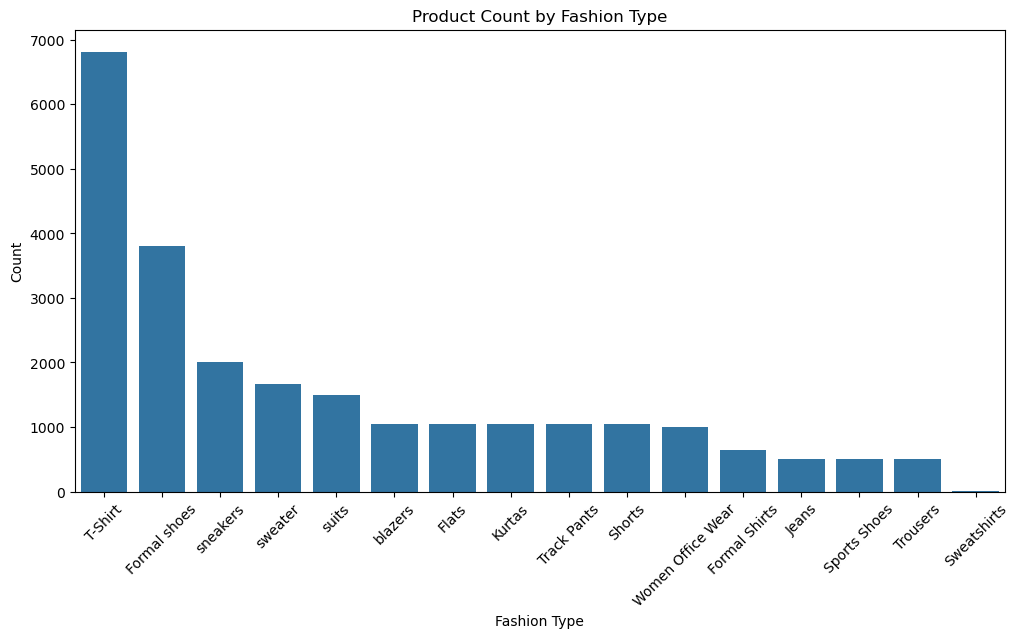

In [54]:
# Product Count based on fashion types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fashion_type', order=df['Fashion_type'].value_counts().index)
plt.title('Product Count by Fashion Type')
plt.xticks(rotation=45)
plt.xlabel('Fashion Type')
plt.ylabel('Count')
plt.show()

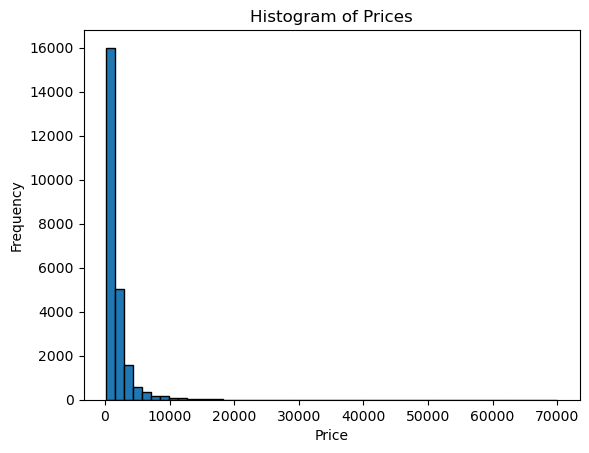

In [56]:
# Creating a histogram to visualize the distribution of prices in our dataset.
plt.hist(df['Price'], bins=50, edgecolor='black')

plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.show()

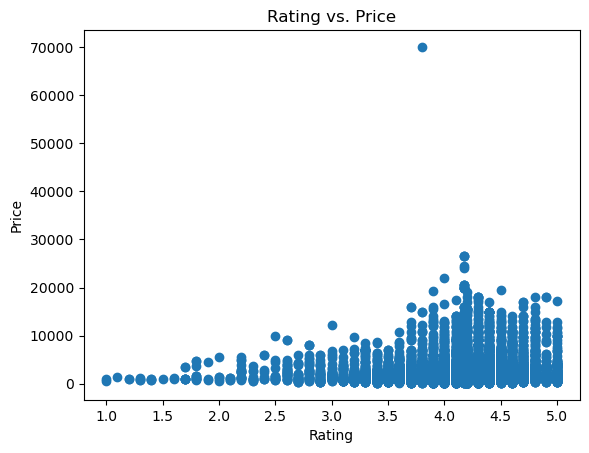

In [58]:
#Using scatter plots to visualize the relationships between Rating vs. Price: to see if there's a correlation between product ratings and prices.
plt.scatter(df['Rating'], df['Price'])

# Add title and labels
plt.title('Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')

# Show the plot
plt.show()

### We Can see as the rating of the product increases the price of the product also increased. But it is not always the case. There are lots of product with highe ratings that has lower price so thay are not strongly correlated .The product that has ratings 4 and its price is 70000 can be a outliers 

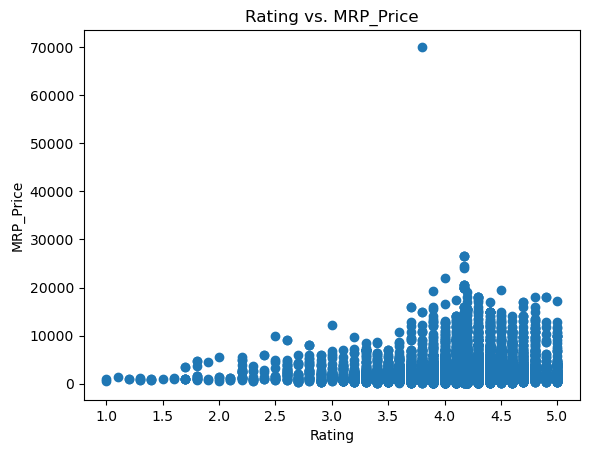

In [61]:
#Using scatter plots to visualize the relationships between Rating vs. MRP_Prices.
plt.scatter(df['Rating'], df['Price'])

# Add title and labels
plt.title('Rating vs. MRP_Price')
plt.xlabel('Rating')
plt.ylabel('MRP_Price')

# Show the plot
plt.show()

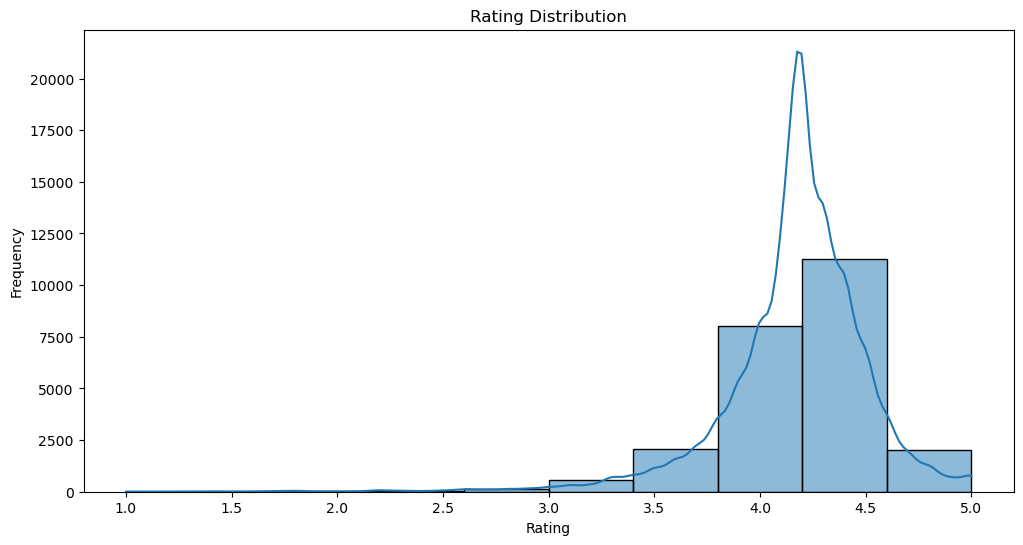

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

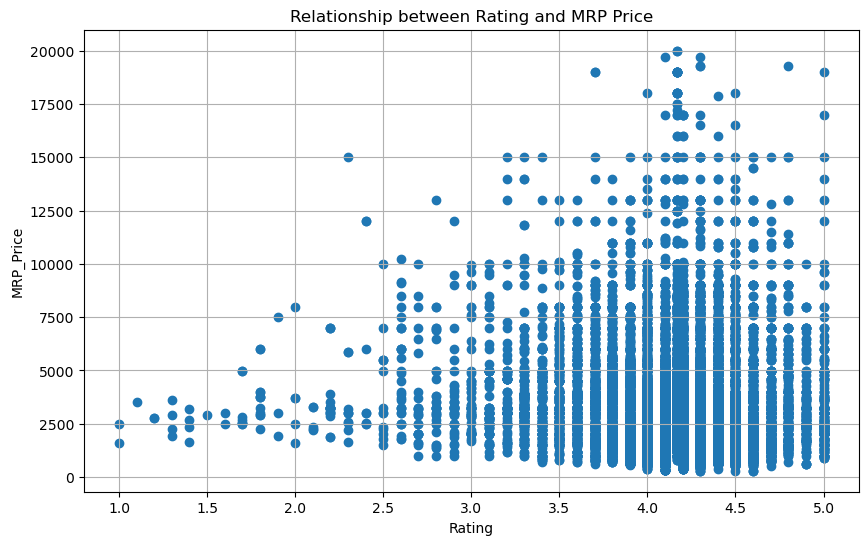

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'], df['MRP_Price'])
plt.xlabel('Rating')
plt.ylabel('MRP_Price')
plt.title('Relationship between Rating and MRP Price')
plt.grid(True)
plt.show()

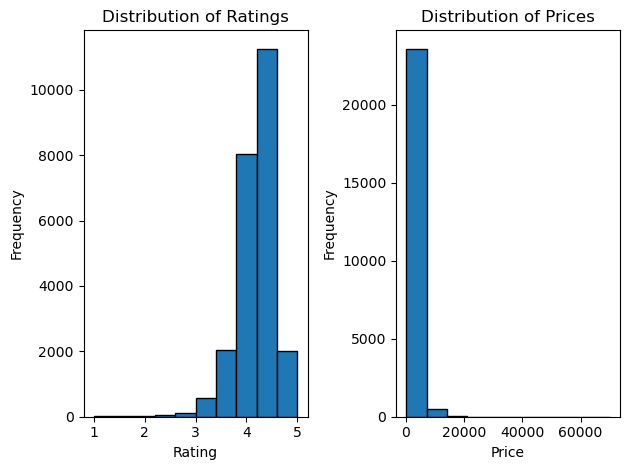

In [67]:
# Histogram for Rating
plt.subplot(1, 2, 1)
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Histogram for Price
plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

plt.tight_layout()
plt.show()

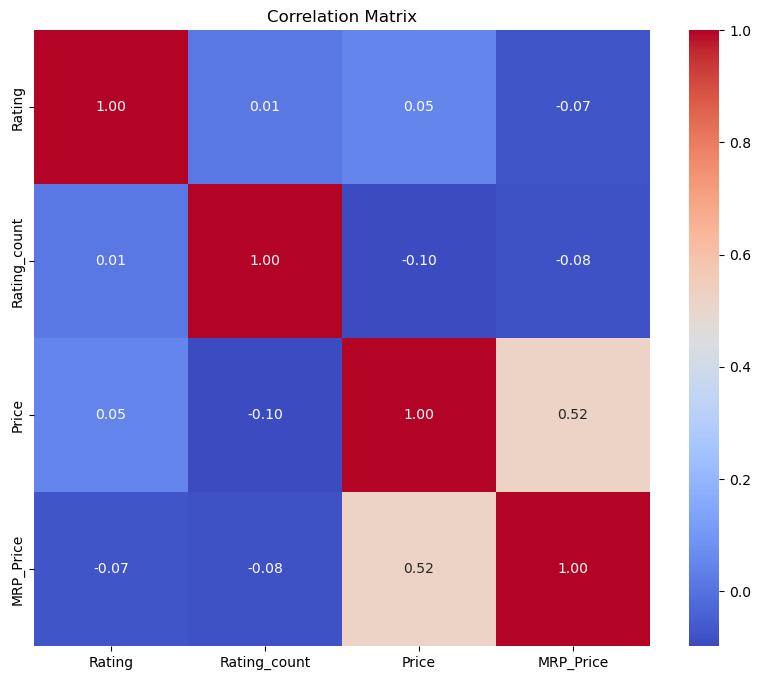

In [69]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Rating', 'Rating_count', 'Price', 'MRP_Price']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### There is no strong corelation between price and the ratings.

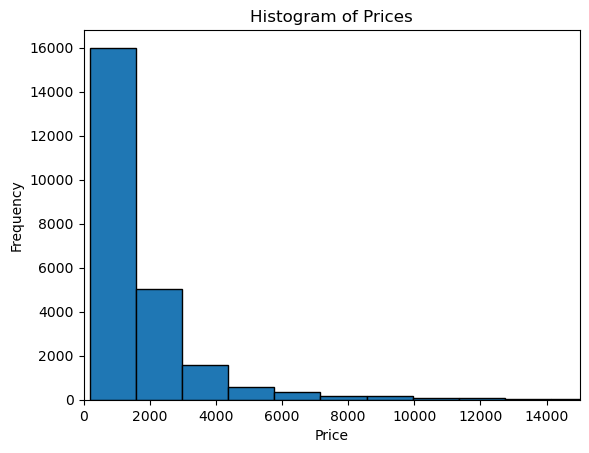

In [72]:

plt.hist(df['Price'], bins=50, edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Reduce the x-axis scale
plt.xlim(0, 15000) 

plt.show()

In [2]:
### !jupyter nbconvert --to html Trendix.ipynb